In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
#plt.style.us('fivethirtyeight')
df=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv',parse_dates=['Date'])
df.head()


AttributeError: module 'matplotlib.style' has no attribute 'us'

In [40]:
df['Total Case']=df[['Confirmed','Recovered','Deaths']].sum(axis=1)
#df.head()


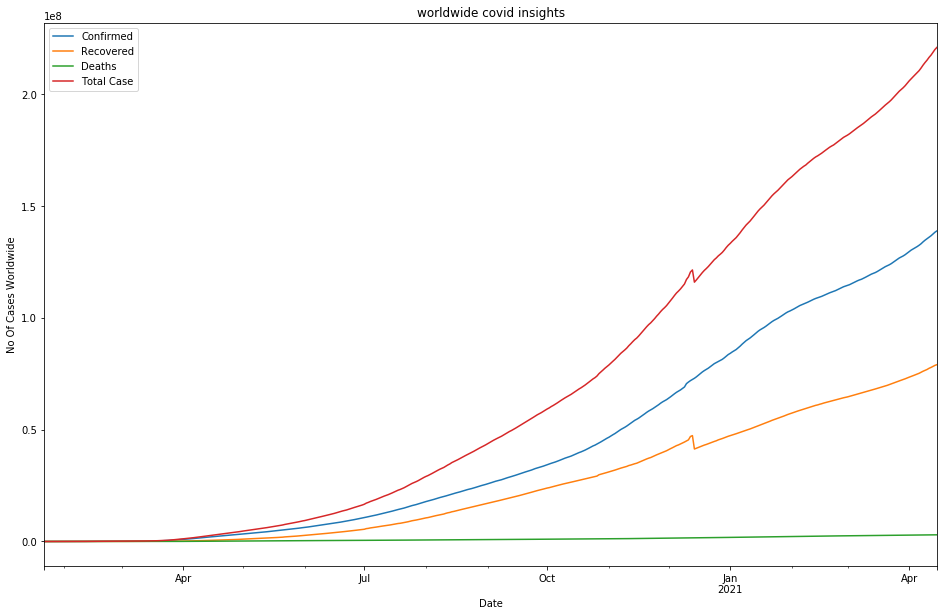

In [41]:
#world wide cases
worldwide_df=df.groupby(['Date']).sum()
w=worldwide_df.plot(figsize=(16,10))
w.set_xlabel('Date')
w.set_ylabel('No Of Cases Worldwide')
w.title.set_text('worldwide covid insights')
plt.show()

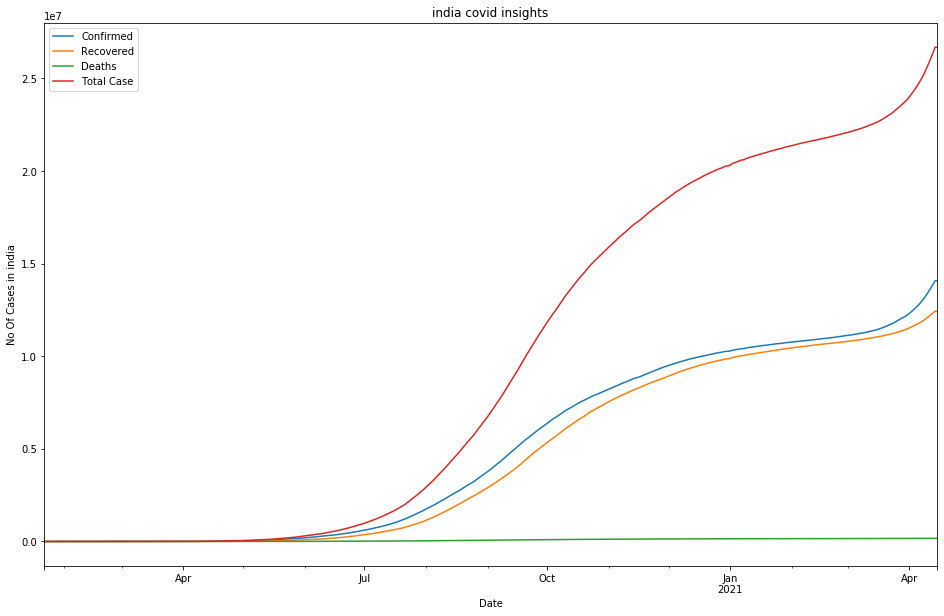

In [42]:
#india cases
idf=df[df['Country']=='India']
india_df=idf.groupby(['Date']).sum()
w=india_df.plot(figsize=(16,10))
w.set_xlabel('Date')
w.set_ylabel('No Of Cases in india')
w.title.set_text('india covid insights')
plt.show()

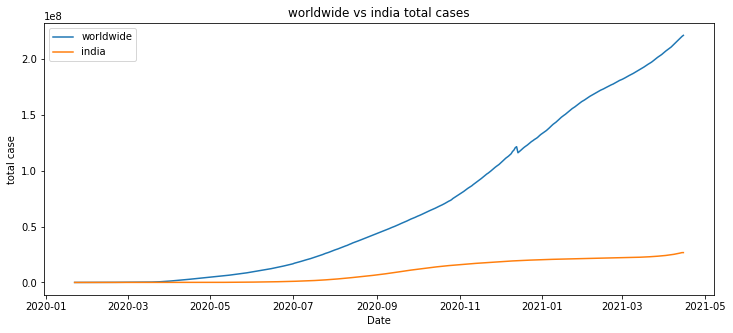

In [52]:
idf=df[df['Country']=='India']
india_df=idf.groupby(['Date']).sum()
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
ax.plot(worldwide_df[['Total Case']],label='worldwide')
ax.plot(india_df[['Total Case']],label='india')
ax.set_xlabel('Date')
ax.set_ylabel('total case')
ax.title.set_text('worldwide vs india total cases')
plt.legend(loc='upper left')
plt.show()



KeyError: 'Date'

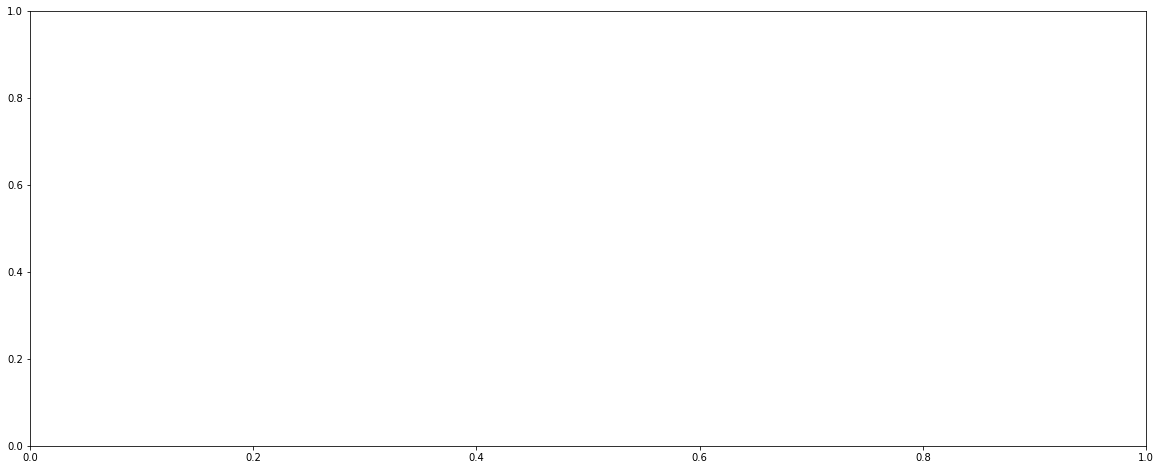

In [53]:
#united states daily cases and deaths
#india_df=india_df.reset_index()
#india_df.head()
india_df['daily confirmed']=india_df['Confirmed'].sub(india_df['Confirmed'].shift())
#india_df
india_df['daily deaths']=india_df['Deaths'].sub(india_df['Deaths'].shift())
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)
ax.bar(india_df['Date'],india_df['daily confirmed'],color='b',label='india daily confirmed case')
ax.bar(india_df['Date'],india_df['daily deaths'],color='r',label='india daily deaths')
ax.set_xlabel('Date')
ax.set_ylabel('no of people affected')
ax.title.set_text('india daily cases')
plt.legend(loc='upper left')
plt.show()


In [92]:
from datetime import date,timedelta
yesterday=date.today()-timedelta(days=1)
yesterday.strftime('%Y-%m-%d')
today_df=df[df['Date']==yesterday]
#today_df.head()
#top_10=today_df.sort_values(['Confirmed'],ascending=False)[:10]
#top_10.head()
print(yesterday)
df['Date']
#df

2021-04-15


0       2020-01-22
1       2020-01-23
2       2020-01-24
3       2020-01-25
4       2020-01-26
           ...    
86395   2021-04-11
86396   2021-04-12
86397   2021-04-13
86398   2021-04-14
86399   2021-04-15
Name: Date, Length: 86400, dtype: datetime64[ns]

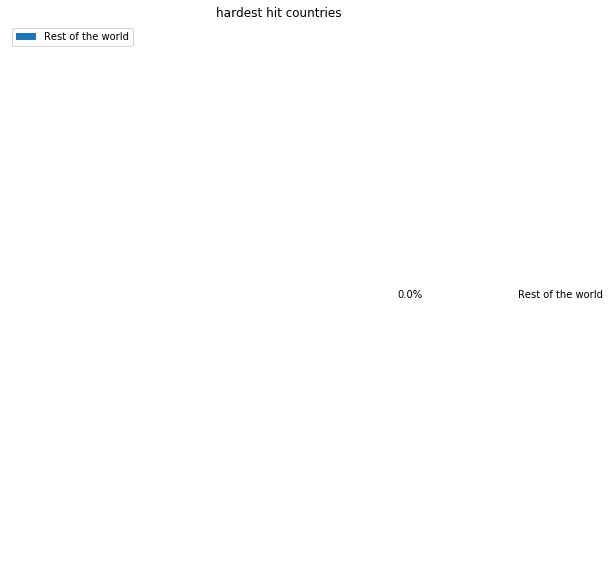

In [77]:
top_10.loc['rest of the world']=today_df.sort_values(['Total Case'],ascending=False)[10:].sum()
top_10.loc['rest of the world','Country']='Rest of the world'
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.pie(top_10['Confirmed'],labels=top_10['Country'],autopct='%1.1f%%')
ax.title.set_text('hardest hit countries')
ax.legend(loc='upper left')
plt.show()